In [17]:
import pandas as pd
from nltk.sem.chat80 import continent
from sympy.strategies.branch import condition

df = pd.read_csv('data/entity_relationships.csv')

main_columns = df.select_dtypes(include=['object']).columns

Index(['entity1', 'relation', 'entity2'], dtype='object')

In [22]:
import pandas as pd

# Load the CSV files
conditions_df = pd.read_csv('cluster/cluster_vector_conditions_value.csv')
symptoms_df = pd.read_csv('cluster/cluster_vector_symptoms_value.csv')

# Specify the column name to compare
column_name = 'value'  # Replace with the actual column name

# Find unique common values across both columns
common_values = pd.merge(conditions_df[[column_name]], symptoms_df[[column_name]], on=column_name, how='inner')

# Drop any duplicate rows
unique_common_values = common_values.drop_duplicates()

# Generate the report in the specified format
report = unique_common_values.apply(lambda row: f"condition({row[column_name]}) similar to symptom({row[column_name]})",
                                    axis=1)

# Display the report
for line in report:
    print(line)

condition(allergy) similar to symptom(allergy)
condition(allergy problem) similar to symptom(allergy problem)
condition(bad allergy) similar to symptom(bad allergy)
condition(severe allergy) similar to symptom(severe allergy)
condition(no allergy) similar to symptom(no allergy)
condition(skin allergy) similar to symptom(skin allergy)
condition(nasal allergy) similar to symptom(nasal allergy)
condition(acute allergy) similar to symptom(acute allergy)
condition(allergy symptom) similar to symptom(allergy symptom)
condition(smell allergy) similar to symptom(smell allergy)
condition(food allergy) similar to symptom(food allergy)
condition(gallbladder attack) similar to symptom(gallbladder attack)
condition(gallbladder infection) similar to symptom(gallbladder infection)
condition(mild disc bulge) similar to symptom(mild disc bulge)
condition(disc bulge) similar to symptom(disc bulge)
condition(posterior disc bulge) similar to symptom(posterior disc bulge)
condition(bulge disc) similar to s

In [24]:
import pandas as pd

# Load the CSV files
conditions_df = pd.read_csv('cluster/cluster_vector_conditions_value.csv')
symptoms_df = pd.read_csv('cluster/cluster_vector_symptoms_value.csv')

# Specify the column name to compare
column_name = 'value'  # Replace with the actual column name

# Find unique common values across both columns
common_values = pd.merge(conditions_df[[column_name]], symptoms_df[[column_name]], on=column_name, how='inner')

# Drop duplicates from the symptoms dataframe based on the common values
cleaned_symptoms_df = symptoms_df[~symptoms_df[column_name].isin(common_values[column_name])]

# Save the cleaned symptoms CSV file
cleaned_symptoms_df.to_csv('cluster/cleaned_cluster_vector_symptoms_value.csv', index=False)

# Generate the report in the specified format
report = common_values.drop_duplicates().apply(
    lambda row: f"condition({row[column_name]}) similar to symptom({row[column_name]})", axis=1)

# Display the report
for line in report:
    print(line)

condition(allergy) similar to symptom(allergy)
condition(allergy problem) similar to symptom(allergy problem)
condition(bad allergy) similar to symptom(bad allergy)
condition(severe allergy) similar to symptom(severe allergy)
condition(no allergy) similar to symptom(no allergy)
condition(skin allergy) similar to symptom(skin allergy)
condition(nasal allergy) similar to symptom(nasal allergy)
condition(acute allergy) similar to symptom(acute allergy)
condition(allergy symptom) similar to symptom(allergy symptom)
condition(smell allergy) similar to symptom(smell allergy)
condition(food allergy) similar to symptom(food allergy)
condition(gallbladder attack) similar to symptom(gallbladder attack)
condition(gallbladder infection) similar to symptom(gallbladder infection)
condition(mild disc bulge) similar to symptom(mild disc bulge)
condition(disc bulge) similar to symptom(disc bulge)
condition(posterior disc bulge) similar to symptom(posterior disc bulge)
condition(bulge disc) similar to s

In [18]:
for col in main_columns:
    cluster_files = [
        f'cluster/cluster_vector_entity_relationships_{col}.csv',
        'cluster/cluster_vector_conditions_value.csv',
        'cluster/cluster_vector_symptoms_value.csv'
    ]
    # for file in cluster_files:
    #     # col_df = pd.read_csv(file)
    #     column_name = file.split('/')[-1].split('.')[0].split('_')[-1]
    #     unique_id_column = f"{column_name}_unique_id"
    #     source_column = f"{column_name}_source"
    #     print(f'{col}={file}={column_name},{unique_id_column},{source_column}')


entity1=cluster/cluster_vector_entity_relationships_entity1.csv=entity1,entity1_unique_id,entity1_source
entity1=cluster/cluster_vector_conditions_value.csv=value,value_unique_id,value_source
entity1=cluster/cluster_vector_symptoms_value.csv=value,value_unique_id,value_source
relation=cluster/cluster_vector_entity_relationships_relation.csv=relation,relation_unique_id,relation_source
relation=cluster/cluster_vector_conditions_value.csv=value,value_unique_id,value_source
relation=cluster/cluster_vector_symptoms_value.csv=value,value_unique_id,value_source
entity2=cluster/cluster_vector_entity_relationships_entity2.csv=entity2,entity2_unique_id,entity2_source
entity2=cluster/cluster_vector_conditions_value.csv=value,value_unique_id,value_source
entity2=cluster/cluster_vector_symptoms_value.csv=value,value_unique_id,value_source


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib_venn import venn2


In [39]:
# Load the CSV files
conditions_df = pd.read_csv('cluster/cluster_vector_conditions_value.csv')
symptoms_df = pd.read_csv('cluster/cleaned_cluster_vector_symptoms_value.csv')

# Specify the column name to compare
column_name = 'value'  # Replace with the actual column name

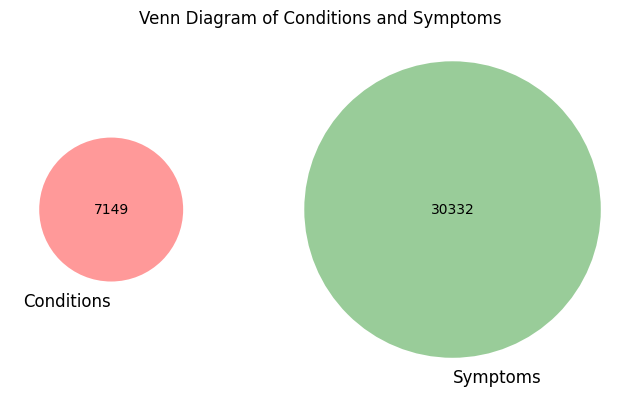

In [40]:
# Create sets for conditions and symptoms
condition_set = set(conditions_df[column_name])
symptom_set = set(symptoms_df[column_name])

# Plot the Venn diagram
plt.figure(figsize=(8, 8))
venn2([condition_set, symptom_set], ('Conditions', 'Symptoms'))
plt.title('Venn Diagram of Conditions and Symptoms')
plt.show()


# inster to sql

In [70]:
import pandas as pd
from sqlalchemy import create_engine, text

# Load CSV file
csv_file = 'cluster/cluster_vector_conditions_value.csv'
df = pd.read_csv(csv_file)

# Rename the columns to match the database table
df = df[['cluster_id', 'cluster_name']]
df = df.rename(columns={
    'cluster_id': 'id',
    'cluster_name': 'name'
})
df = df.drop_duplicates(subset=['id', 'name'])

# Set a fixed value for the 'type' column
df['type'] = 'condition'
len(df)

1942

In [71]:

# # Define the connection parameters
db_config = {
    'user': 'root',
    'password': 'hani1234',
    'host': 'localhost',
    'database': 'medical'
}
# 
# # Create the connection string
connection_string = f"mariadb+mariadbconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}"
# 
# # Create a SQLAlchemy engine
engine = create_engine(connection_string)
# 
# # Insert the data into the table
df.to_sql('clusters', con=engine, if_exists='append', index=False)
print("Data inserted successfully!")

Data inserted successfully!


In [87]:
df = pd.read_csv('cluster/cluster_vector_entity_relationships_relation.csv')
len(df['cluster_id'].unique())

507

In [102]:
df = pd.read_csv('data/categories.csv')
df = df[['name']]
df = df.drop_duplicates()
df.head(2)

,name
0,internal medicine
1,public health


In [103]:
# Create the connection string
connection_string = f"mariadb+mariadbconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# # Insert the data into the table
df.to_sql('categories', con=engine, if_exists='append', index=False)
print("Data inserted successfully!")


Data inserted successfully!


In [119]:
from sqlalchemy import create_engine, text

# first add the full cases 36K
# map each conditions ( symptom, relation, entity1, entity2 )
# start by conditions
conditions = pd.read_csv('data/conditions.csv')
categories = pd.read_csv('data/categories.csv')
for index, condition in conditions[0:10].iterrows():
    matched_category = categories[categories['category_id'] == condition['category_id']].iloc[0:1]
    # Define the query
    query = text("SELECT id as `id` FROM categories WHERE name = :name limit 1")

    # Execute the query using a connection from the engine
    with engine.connect() as connection:
        result = connection.execute(query, {"name": matched_category.name.values[0]}).fetchone()

    # Check if the result is found
    if result:
        print(f"found {matched_category.name.values[0]} at: {result[0]}")
    else:
        print(f"cant find: {matched_category.name.values[0]}")

found internal medicine at: 1
found internal medicine at: 1
found internal medicine at: 1
found internal medicine at: 1
found internal medicine at: 1
found internal medicine at: 1
found allergy and immunology at: 4
found allergy and immunology at: 4
found dermatology at: 5
found dermatology at: 5
